<a href="https://colab.research.google.com/github/RyniekSzkola/175IC-machine-learning/blob/main/Zad_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [7]:
sns.set()

raw_data = load_iris()
all_data = raw_data.copy()
 
data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

print(f'Liczba probek: {len(data)}')
print(f'Ksztalt danych: {data.shape}')
print(f'Nazwy zmiennych: {feature_names}')
print(f'Nazwy kategorii: {target_names}')

Liczba probek: 150
Ksztalt danych: (150, 4)
Nazwy zmiennych: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Nazwy kategorii: ['setosa' 'versicolor' 'virginica']


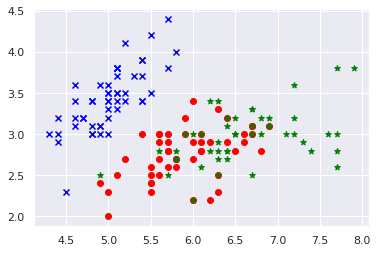

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


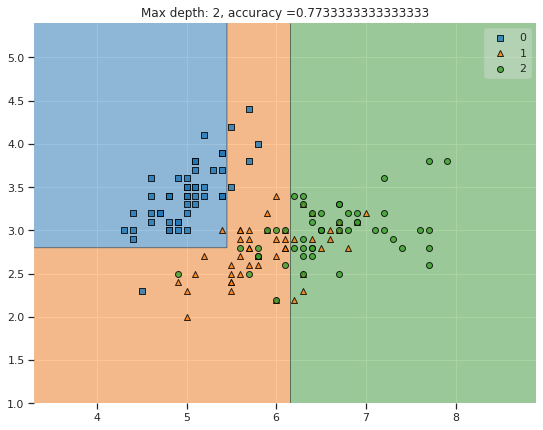

In [12]:
data = pd.DataFrame(data=data, columns=feature_names)
target = pd.DataFrame(data=target, columns=['target'])
 
data.pop('petal width (cm)')
data.pop('petal length (cm)')

plt.scatter(data['sepal length (cm)'][:50], data['sepal width (cm)'][:50], c="Blue", marker='x')
plt.scatter(data['sepal length (cm)'][51:100], data['sepal width (cm)'][51:100], c="Red", marker='o')
plt.scatter(data['sepal length (cm)'][101:], data['sepal width (cm)'][101:], c="Green", marker='*')
plt.show()

dpth = 2
classifier = DecisionTreeClassifier(max_depth=dpth)
classifier.fit(data, target)

acc = classifier.score(data, target)

plt.figure(figsize=(9,7))
plot_decision_regions(np.array(data), np.array(target).reshape(150), classifier)
plt.title(f'Max depth: {dpth}, accuracy ={acc}')
plt.show()

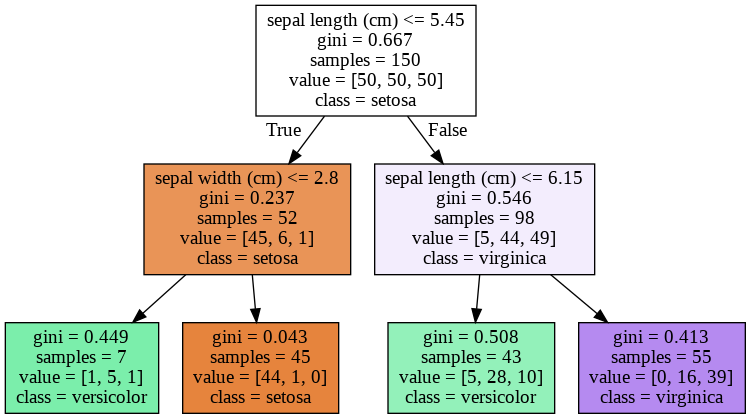

In [9]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=feature_names[:2], class_names=target_names, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


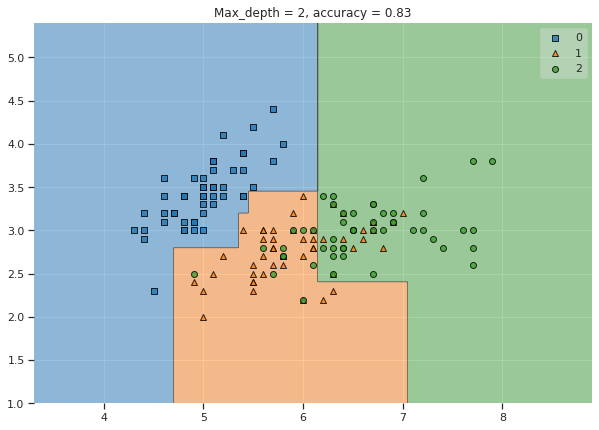

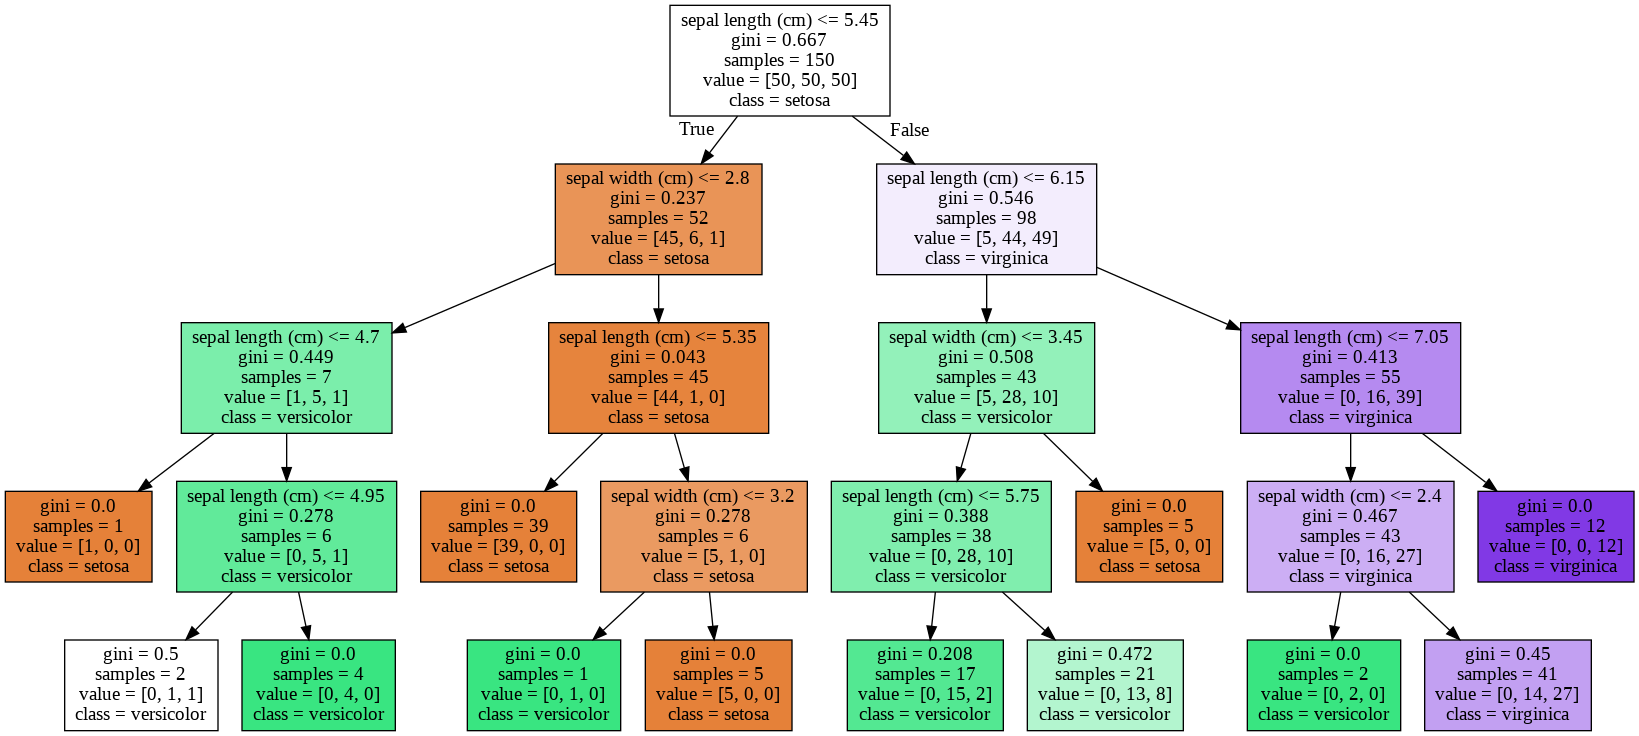

In [10]:
def make_decision_tree(max_depth = 1):
    classifier = DecisionTreeClassifier(max_depth=max_depth)
    classifier.fit(data,target)
 
    dot_data = StringIO()
    export_graphviz(classifier, out_file=dot_data, feature_names=feature_names[:2], class_names=target_names, filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
 
    acc =classifier.score(data,target)
    
    plt.figure(figsize=(10,7))
    plot_decision_regions(np.array(data), np.array(target).reshape(150), classifier)
    plt.title(f'Max_depth = {dpth}, accuracy = {acc:.2}')
    plt.show()
 
    return Image(graph.create_png())

make_decision_tree(4)